In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from classifier import rf, plot_confusion_matrix, lda, qda, qda_lol, lda_lol

#### Class labels
GABA
* 0 = Non-GABA
* 1 = GABA

Shaft 
* 0 = Non-shaft
* 1 = Shaft

GABA + Shaft
* 0 = Non-GABA, Non-Shaft
* 1 = Non-GABA, Shaft
* 2 = GABA, Non-Shaft
* 3 = GABA, Shaft

In [3]:
X = np.load('./data/data_isotropic.npy')
gaba = np.load('./data/gaba_label.npy')
shaft = np.load('./data/shaft_label.npy')
gaba_shaft = np.load('./data/gaba_shaft_label.npy')
mask = np.load('./data/15_9_9_edge_mask.npy')

In [4]:
X = X[mask]
gaba = gaba[mask]
shaft = shaft[mask]
gaba_shaft = gaba_shaft[mask]

#### Compute mean intensity in each cube for each channel
The output should be of shape (n_samples, n_channels)

In [5]:
X_mean = X.mean(axis=(2, 3, 4))

X_mean.shape

(927, 8)

#### Look at the distribution of the data for Non-GABA vs GABA

In [6]:
channels = ['GABA', 'GAD2', 'Gephyrin', 'GluN1', 'PSD95', 'synapsin', 'TdTomato', 'VGlut1']

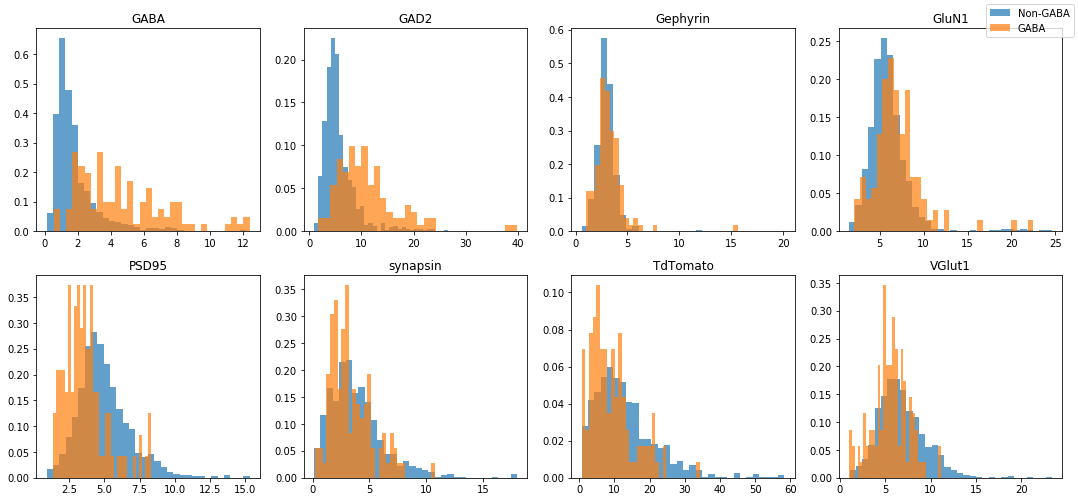

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
ax = ax.ravel()
for i in range(8):
    y0 = X_mean[gaba==0]
    y1 = X_mean[gaba==1]
    ax[i].hist(y0[:, i], bins=32,  density=True, alpha=0.7, label='Non-GABA')
    ax[i].hist(y1[:, i], bins=32, density=True, alpha=0.7, label='GABA')
    ax[i].set_title(channels[i])
    
ax = ax.reshape((2, 4))
fig.tight_layout()
fig.legend()

#### Run classifiers

In [8]:
labels = ['Non-GABA', 'GABA']

Confusion matrix, without normalization
[[0.97221457 0.02778543]
 [0.67818182 0.32181818]]


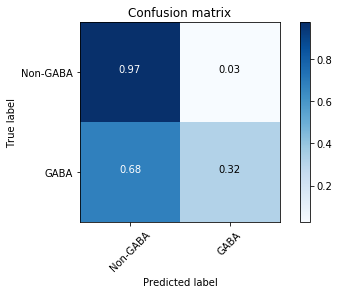

In [9]:
plot_confusion_matrix(rf(X_mean, gaba, normalize=False,  n_repeats=10), classes=labels)

Confusion matrix, without normalization
[[0.96010774 0.03989226]
 [0.53272727 0.46727273]]


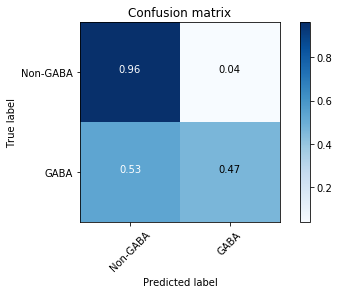

In [10]:
plot_confusion_matrix(lda(X_mean, gaba, normalize=False), classes=labels)

Confusion matrix, without normalization
[[0.96255574 0.03744426]
 [0.51454545 0.48545455]]


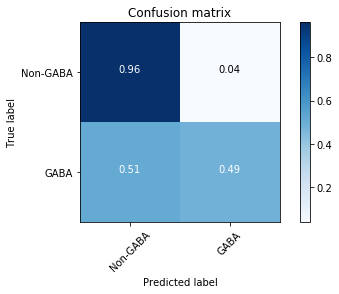

In [23]:
plot_confusion_matrix(lda_lol(X_mean, gaba, n_components=6, normalize=False), classes=labels)

Confusion matrix, without normalization
[[0.92680982 0.07319018]
 [0.48181818 0.51818182]]


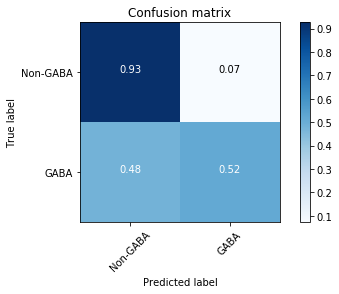

In [11]:
plot_confusion_matrix(qda(X_mean, gaba, normalize=False), classes=labels)

Confusion matrix, without normalization
[[0.9407751  0.0592249 ]
 [0.49272727 0.50727273]]


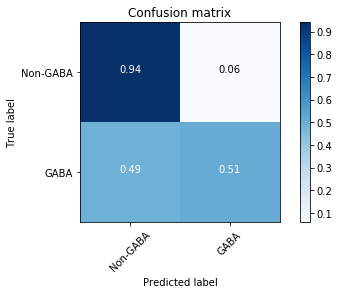

In [12]:
plot_confusion_matrix(qda_lol(X_mean, gaba, normalize=False), classes=labels)

#### Look at the distribution of data for 4 class problem

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
ax = ax.ravel()
for i in range(8):
    y0 = X_mean[gaba_shaft==0]
    y1 = X_mean[gaba_shaft==1]
    y2 = X_mean[gaba_shaft==2]
    y3 = X_mean[gaba_shaft==3]
    ax[i].hist(y0[:, i], bins=32,  density=True, alpha=0.5, label='Non-GABA, Non-Shaft')
    ax[i].hist(y1[:, i], bins=32, density=True, alpha=0.5, label='Non-GABA, Shaft')
    ax[i].hist(y2[:, i], bins=32, density=True, alpha=0.5, label='GABA, Non-Shaft')
    ax[i].hist(y3[:, i], bins=32, density=True, alpha=0.5, label='GABA, Shaft')
    ax[i].set_title(channels[i])
    
ax = ax.reshape((2, 4))
fig.legend(loc=0)
fig.tight_layout()

In [ ]:
plot_confusion_matrix(qda(X_mean, gaba_shaft, normalize=False), classes=labels)

In [ ]:
plot_confusion_matrix(qda_lol(X_mean, gaba_shaft, normalize=False), classes=labels)

In [ ]:
plot_confusion_matrix(qda_lol(X_mean, gaba_shaft, normalize=False), classes=labels)

In [ ]:
plot_confusion_matrix(qda(X_mean, shaft, normalize=False), classes=labels)